# multipel linjär regression



$$Y = X\beta + E$$

där X ör modellspecifikations matrisen, E är vektorn med stokastiska fel med avseeende på väntevärdet och y är en respons för vektorn för y över hela stickprovet.

In [1]:
import pandas as pd
import numpy as np

data_path = "/Users/luddecmc/Desktop/SKOLARBETE-ITHS/repos/AI24-Statistiska-metoder/Data"

adv = pd.read_csv(data_path+"/Advertising.csv", index_col=0)
adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
test_df = pd.DataFrame(adv[:10])
train_df = pd.DataFrame(adv[10:160])
val_df = pd.DataFrame(adv[160:])

X_test = np.column_stack([np.ones(10),test_df["TV"], test_df["radio"], test_df["TV"]*test_df["radio"]])
Y_test = test_df["sales"]

X_train = np.column_stack([np.ones(150),train_df["TV"], train_df["radio"], train_df["TV"]*train_df["radio"]])
Y_train = train_df["sales"]

X_val = np.column_stack([np.ones(40),val_df["TV"], val_df["radio"], val_df["TV"]*val_df["radio"]])
Y_val = val_df["sales"]
# responsvektorn/responsvariabeln
# Y = adv["sales"]
# designmatris
# X = np.column_stack([np.ones(Y.shape[0]),adv["TV"], adv["radio"], adv["TV"]*adv["radio"]])



$$
\hat{\mathbf{\beta}} = (X^TX)^{-1}X^TY
$$

In [3]:
# koeffecientvektor
b = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ Y_train

$$ SSE = (y1 -\hat\beta0 - \hat\beta1 x1)^2 + (y2 - \hat\beta0 - \hat\beta1 x2)^2 + ... + (yn - \hat\beta0 - \hat\beta1 xn)^2$$

In [4]:
#antalet dimensioner/parametrar
k = len(b)-1
n = len(Y_train) # eller Y.shape[0]
SSE = np.sum(np.square(Y_val - (X_val @ b)))



var = SSE/(n-k-1)

# SIGMA HATT KVADRAT
S = np.sqrt(var)


# SSY
Syy = (n*np.sum(np.square(Y_val)) - np.square(np.sum(Y_val)))/n

# residual
SSR = Syy - SSE
# eller
# SSR_2 = (n*np.sum(b*(X.T @ Y)) - np.square(np.sum(Y)))/n
SSR


6683.630769660356

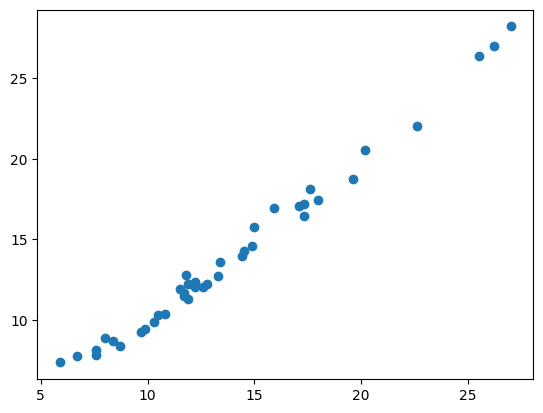

In [5]:
import matplotlib.pyplot as plt


plt.scatter(Y_val, X_val @ b)

In [6]:
b

array([6.88157647e+00, 1.86678349e-02, 2.42869419e-02, 1.10431159e-03])

In [7]:
#rkvadrat - konfidensgrad
Rsq = SSR/Syy

Rsq

# avrundad till 90%
# choose 90% as confidence level

0.9977033993820285

In [8]:
import scipy.stats as stats
# signifikanstest
# H0: All \beta = 0
sig_statistic = (SSR/k)/S
p_significance = stats.f.sf(sig_statistic, k, n-k-1)
# p värdet representerar här en sannolikhet
p_significance


7.291164286367215e-157

In [9]:
# slutsats, extremt låg sannolikhet att H0 är sann, we reject the null hypothesis, regression IS significant

variance / covariance matrix
$$
c = (X^TX)^{-1}\sigma^2
$$

In [10]:
# variance/covariance matrix
c = np.linalg.pinv(X_train.T @ X_train)*var

# tittar på newspaper som var minus
b3_statistic = b[3] / (S*np.sqrt(c[3,3]))

# null hypothesis: beta_3 = 0, beta3 är inte signifikant, dvs newspaper är inte signifikant

p_b3 = 2*min(stats.t.cdf(b3_statistic, n-k-1), stats.t.sf(b3_statistic, n-k-1))
p_b3

1.4038828172294987e-162

detta tyder på att b3 är irrelevant

In [11]:
RSE = np.sqrt(1/(n-2))*SSE
RSE


1.2646362237833524

In [12]:
SSE_test = np.sum(np.square(Y_test - (X_test @ b)))
RSE = np.sqrt((1/(n-2))*SSE_test)
RSE

0.27241384575098876